<a href="https://colab.research.google.com/github/ReillyOareVT/HydroLearners_Proj/blob/main/eda/Static_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Static Data EDA**
**Author:** Emma Reilly Oare
<br>**Date:** April 17, 2025
<br>**Purpose:** Exploratory data analysis (EDA) of all static attributes for later feature engineering. These datasets will be used for clustering and mean regression.

In [32]:
# Read in libs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np
import os

# Show all columns
pd.set_option('display.max_columns', None)

In [8]:
# Only clone if the repo doesn't already exist
if not os.path.exists('/content/HydroLearners_Proj'):
    !git clone https://github.com/ReillyOareVT/HydroLearners_Proj

# Change directory
BASE_DIR = '/content/HydroLearners_Proj'
os.chdir(BASE_DIR)

# Confirm location
!pwd

Cloning into 'HydroLearners_Proj'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 53 (delta 11), reused 23 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 15.08 MiB | 16.17 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/HydroLearners_Proj


## Step 1: Read in Data

In [11]:
# Define path
static_path = os.path.join(BASE_DIR, 'eda', 'processed_data', 'joined_static_df.xlsx')

# Read in df
static_df = pd.read_excel(static_path).drop(columns = 'Unnamed: 0')

In [16]:
# Display df
static_df

,Basin ID,% Evaporites,% Ice and Glaciers,% Metamorphics,% No Data,% Acid Plutonic Rocks,% Basic Putonic Rocks,% ntermedite Plutonic Rocks,% Pyroclastics,% Carbonate Sedimentary Rocks,% Mixed Sedimentary Rocks,% Siliciclastic Sedimentary Rocks,% Unconsolidated Sediments,% Acid Volcanic Rocks,% Basic Volcanic Rocks,% Intermediate Volcanic Rocks,% Water Bodies,Lithological Dominant Class,% of Watershed in GLiM,Depth to Bedrock,# of Upstream Dams,# of Upstream Reservoirs,# of Upstream Lakes,Total Area of Upstream Lakes,Total Upstream Lake Volume,Mean Daily Streamflow (mm/day),Ratio of Mean Daily Streamflow/Precipitation,Streamflow Precipitation Elasticity,5% Flow Quantile (mm/day),95% Flow Quantile (mm/day),Days/Year with No Flow,Mean Daily Precipitation (mm/day),Mean Daily PET (mm/day),Ratio of PET/Precipitation,Seasonality/Timing of Precipitation,Fraction of Snow on Days <0 C,Days/Year of High Precipitation,Avg Duration of High Precipitation,Season of High Precipitation Events,Days/Year of Low Precipitation,Avg Duration of Low Precipitation,Season of Low Precipitation Events,# of Years with Hydrological Observations,First Date with Hydrological Observations,End Date of Hydrological Observations,# of Years with Meteorological Observations,First Date with Meteorological Observations,End Date of Meteorological Observations,Mean Root Depth (cm),Max Root Depth (cm),Min Root Depth (cm),5% Quantile Root Depth (cm),25% Quantile Root Depth (cm),50% Quantile Root Depth (cm),75% Quantile Root Depth (cm),90% Quantile Root Depth (cm),Mean Available Water Content (mm),Max Available Water Content (mm),Min Available Water Content (mm),5% Quantile Water Content (mm),25% Quantile Water Content (mm),50% Quantile Water Content (mm),75% Quantile Water Content (mm),90% Quantile Water Content (mm),Mean % Sand in Soil,Max % Sand in Soil,Min % Sand in Soil,5% Quantile % Sand in Soil,25% Quantile % Sand in Soil,50% Quantile % Sand in Soil,75% Quantile % Sand in Soil,90% Quantile % Sand in Soil,Mean % Silt in Soil,Max % Silt in Soil,Min % Silt in Soil,5% Quantile % Silt in Soil,25% Quantile % Silt in Soil,50% Quantile % Silt in Soil,75% Quantile % Silt in Soil,90% Quantile % Silt in Soil,Mean % Clay in Soil,Max % Clay in Soil,Min % Clay in Soil,5% Quantile % Clay in Soil,25% Quantile % Clay in Soil,50% Quantile % Clay in Soil,75% Quantile % Clay in Soil,90% Quantile % Clay in Soil,Mean % Gravel in Soil,Max % Gravel in Soil,Min % Gravel in Soil,5% Quantile % Gravel in Soil,25% Quantile % Gravel in Soil,50% Quantile % Gravel in Soil,75% Quantile % Gravel in Soil,90% Quantile % Gravel in Soil,Mean Soil Bulk Density (g/cm3),Max Soil Bulk Density (g/cm3),Min Soil Bulk Density (g/cm3),5% Quantile Soil Bulk Density (g/cm3),25% Quantile Soil Bulk Density (g/cm3),50% Quantile Soil Bulk Density (g/cm3),75% Quantile Soil Bulk Density (g/cm3),90% Quantile Soil Bulk Density (g/cm3),Mean % Soil Organic Material,Max % Soil Organic Material,Min % Soil Organic Material,5% Quantile % Soil Organic Material,25% Quantile % Soil Organic Material,50% Quantile % Soil Organic Material,75% Quantile % Soil Organic Material,90% Quantile % Soil Organic Material,Max Elevation (m),Mean Elevation (m),Min Elevation (m),Mean Terrain Slope (Degrees),% of Watershed Slope <3 Degrees,% of Watershed Slope >15 Degrees,Elongation Ratio,Stream Density (1000km/km2),Mean Jan Leaf-Area Index,Mean Feb Leaf-Area Index,Mean Mar Leaf-Area Index,Mean Apr Leaf-Area Index,Mean May Leaf-Area Index,Mean Jun Leaf-Area Index,Mean Jul Leaf-Area Index,Mean Aug Leaf-Area Index,Mean Sep Leaf-Area Index,Mean Oct Leaf-Area Index,Mean Nov Leaf-Area Index,Mean Dec Leaf-Area Index,Mean Leaf-Area Index,Mean Jan NDVI,Mean Feb NDVI,Mean Mar NDVI,Mean Apr NDVI,Mean May NDVI,Mean Jun NDVI,Mean Jul NDVI,Mean Aug NDVI,Mean Sep NDVI,Mean Oct NDVI,Mean Nov NDVI,Mean NDVI
0,AT000001,0.0,0.553,23.464,0.0,2.657,0.042,0.19,0.0,38.753,5.521,3.888,22.064,0.776,1.858,0.0,0.0,sc,100.0,1.124,23,10,10,6.62,542.33,2.824,0.727,1.266,1.029

## Step 2. Exploratory Data Analysis

### Step 2a. Preliminary, Group-Based EDA
Based on the DataCleaning notebook, we have a good idea of which columns come from which datasets. We'll look at these groups individually first.

#### Geology

In [17]:
# Identify % geology columns
geology_cols = [
    '% Evaporites', '% Ice and Glaciers', '% Metamorphics', '% No Data',
    '% Acid Plutonic Rocks', '% Basic Putonic Rocks', '% ntermedite Plutonic Rocks',
    '% Pyroclastics', '% Carbonate Sedimentary Rocks', '% Mixed Sedimentary Rocks',
    '% Siliciclastic Sedimentary Rocks', '% Unconsolidated Sediments',
    '% Acid Volcanic Rocks', '% Basic Volcanic Rocks', '% Intermediate Volcanic Rocks',
    '% Water Bodies'
]

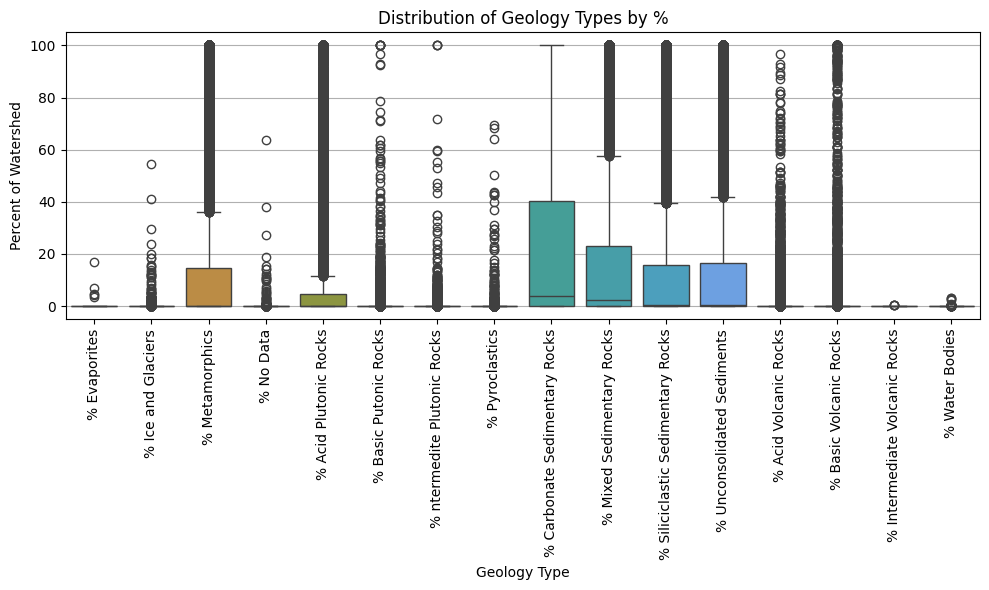

In [36]:
# Create boxplot of % geology types
melted = static_df[geology_cols].melt(var_name='Geology Type', value_name='Percent of Watershed')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Geology Type', y='Percent of Watershed', hue = 'Geology Type')
plt.xticks(rotation=90)
plt.title('Distribution of Geology Types by %')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

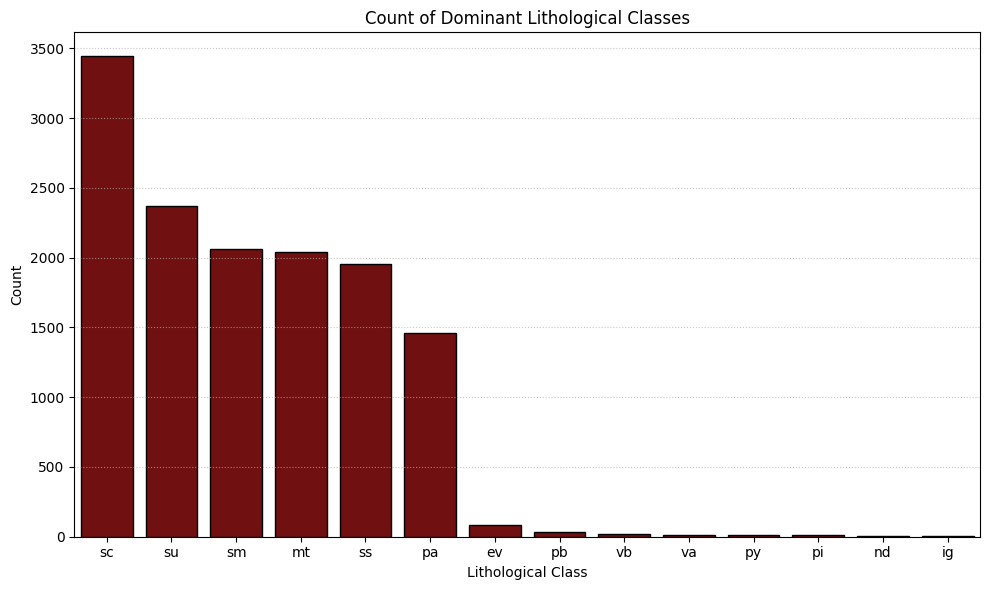

In [55]:
# Plot bar plot of dominant lithological class
plt.figure(figsize=(10, 6))
sns.countplot(data=static_df, x='Lithological Dominant Class',
              order=static_df['Lithological Dominant Class'].value_counts().index,
              color = 'maroon', edgecolor = 'k')
plt.title('Count of Dominant Lithological Classes')
plt.xlabel('Lithological Class')
plt.ylabel('Count')
plt.grid(axis = 'y', alpha = 0.7, linestyle = ':')
plt.tight_layout()
plt.show()

#### Hydrology Attributes

In [48]:
# Identify hydrology attribute columns
num_things_cols = [
    '# of Upstream Dams',	'# of Upstream Reservoirs',	'# of Upstream Lakes'
]
storage_cols =[
    'Total Area of Upstream Lakes',	'Total Upstream Lake Volume'
]

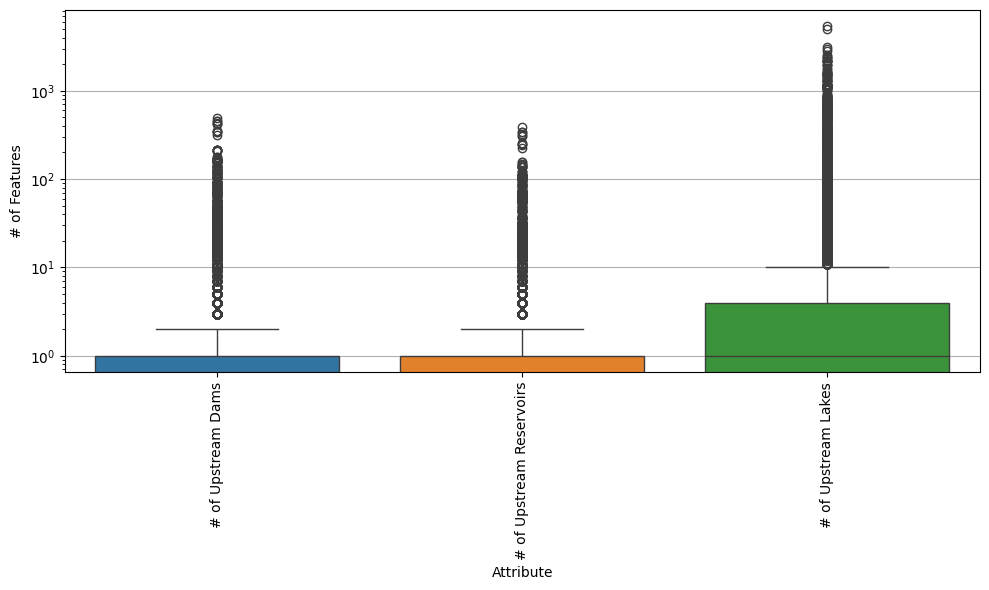

In [52]:
# Create boxplot of features
melted = static_df[num_things_cols].melt(var_name='Attribute', value_name='# of Features')
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='Attribute', y='# of Features', hue = 'Attribute')
plt.xticks(rotation=90)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'y')

plt.show()

In [56]:
# Display summary stats for lake info
static_df[storage_cols].describe()

,Total Area of Upstream Lakes,Total Upstream Lake Volume
count,13516.000000,1.351600e+04
mean,54.301458,1.011519e+03
std,583.551797,1.335122e+04
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,2.670000,2.202250e+01
max,45825.360000,1.301789e+06


#### Hydrology & Meteorology

<Axes: xlabel='Mean Daily Precipitation (mm/day)', ylabel='Mean Daily Streamflow (mm/day)'>

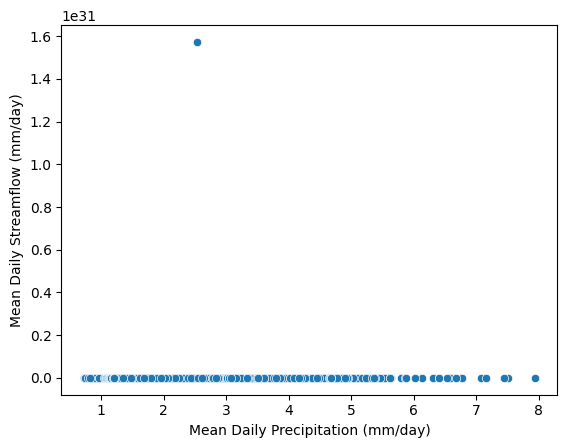

In [59]:
sns.scatterplot(data = static_df, y = 'Mean Daily Streamflow (mm/day)', x = 'Mean Daily Precipitation (mm/day)')